### Import Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning);

# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_columns', 200)
# pd.set_option('display.width', 20)
%matplotlib inline

### Train and Test Data Imports

In [2]:
# train
df = pd.read_csv('datasets/train.csv')
df.shape

(2051, 81)

In [3]:
# test
kaggle_data = pd.read_csv('datasets/test.csv')
kaggle_data.shape

(878, 80)

In [4]:
# First Submission little sample
submission = pd.DataFrame({'Id': kaggle_data['Id']})
submission['SalePrice'] = df['SalePrice'].mean()
submission.head()

Id      SalePrice
0  2658  181469.701609
1  2718  181469.701609
2  2414  181469.701609
3  1989  181469.701609
4   625  181469.701609

In [5]:
submission.to_csv('datasets/mean_sub.csv', index=False)

### First we clean the data and perform exploratory data analysis (EDA)

In [6]:
kaggle_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Mas Vnr Type    1240
                ... 
Misc Val           0
Mo Sold            0
Yr Sold            0
Sale Type          0
SalePrice          0
Length: 81, dtype: int64

In [8]:
kaggle_data.isnull().sum().sort_values(ascending=False)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Mas Vnr Type      535
                 ... 
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Length: 80, dtype: int64

### Fill rows with null values with mean value in each respective column (these are ones with highest $\text{R}^2$ values).

In [9]:
columns_to_fillna = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Garage Yr Blt', 'TotRms AbvGrd', 'Mas Vnr Area']
df[columns_to_fillna] = df[columns_to_fillna].fillna(df[columns_to_fillna].mean())
kaggle_data[columns_to_fillna] = kaggle_data[columns_to_fillna].fillna(kaggle_data[columns_to_fillna].mean())

### Normalize null values of Lot Frontage in order to use them in the data analysis because this is an important numerical category. Do this for lone Basement finish SF 1 variable.

In [10]:
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace=True)

In [11]:
kaggle_data['Lot Frontage'].fillna(kaggle_data['Lot Frontage'].mean(), inplace=True)

In [12]:
df['BsmtFin SF 1'].fillna(df['BsmtFin SF 1'].mean(), inplace=True)

In [13]:
kaggle_data['BsmtFin SF 1'].fillna(kaggle_data['BsmtFin SF 1'].mean(), inplace=True)

### Recheck null value counts.

In [14]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Mas Vnr Type    1240
                ... 
Misc Val           0
Mo Sold            0
Yr Sold            0
Sale Type          0
SalePrice          0
Length: 81, dtype: int64

In [15]:
kaggle_data.isnull().sum().sort_values(ascending=False)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Mas Vnr Type      535
                 ... 
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Length: 80, dtype: int64

# Brainstorm factors to go by: 

## Ten in total ##

### Numerical:
Lot Area 
Lot frontage [yard]
Garage Area
Garage Cars

### Non-Numerical:

Sale Type 
Overall Qual
Overall Cond
Kitchen Qual 

### Relationship Variables

Time stamps:

Year Built and year remodeled Year Remod/Add - If these are spaced apart then we hypothesize value is up.
If one not the other, value down (i.e. built but never remodeled)


### Methodology: Start with heatmaps and histograms for numerical comparsion to get the right direction

#### Then work to Create Integer Encoding for The conditions of things
#### One-Hot Categorical Data Where you only want to keep the top category and leave that digit at the True (1) value

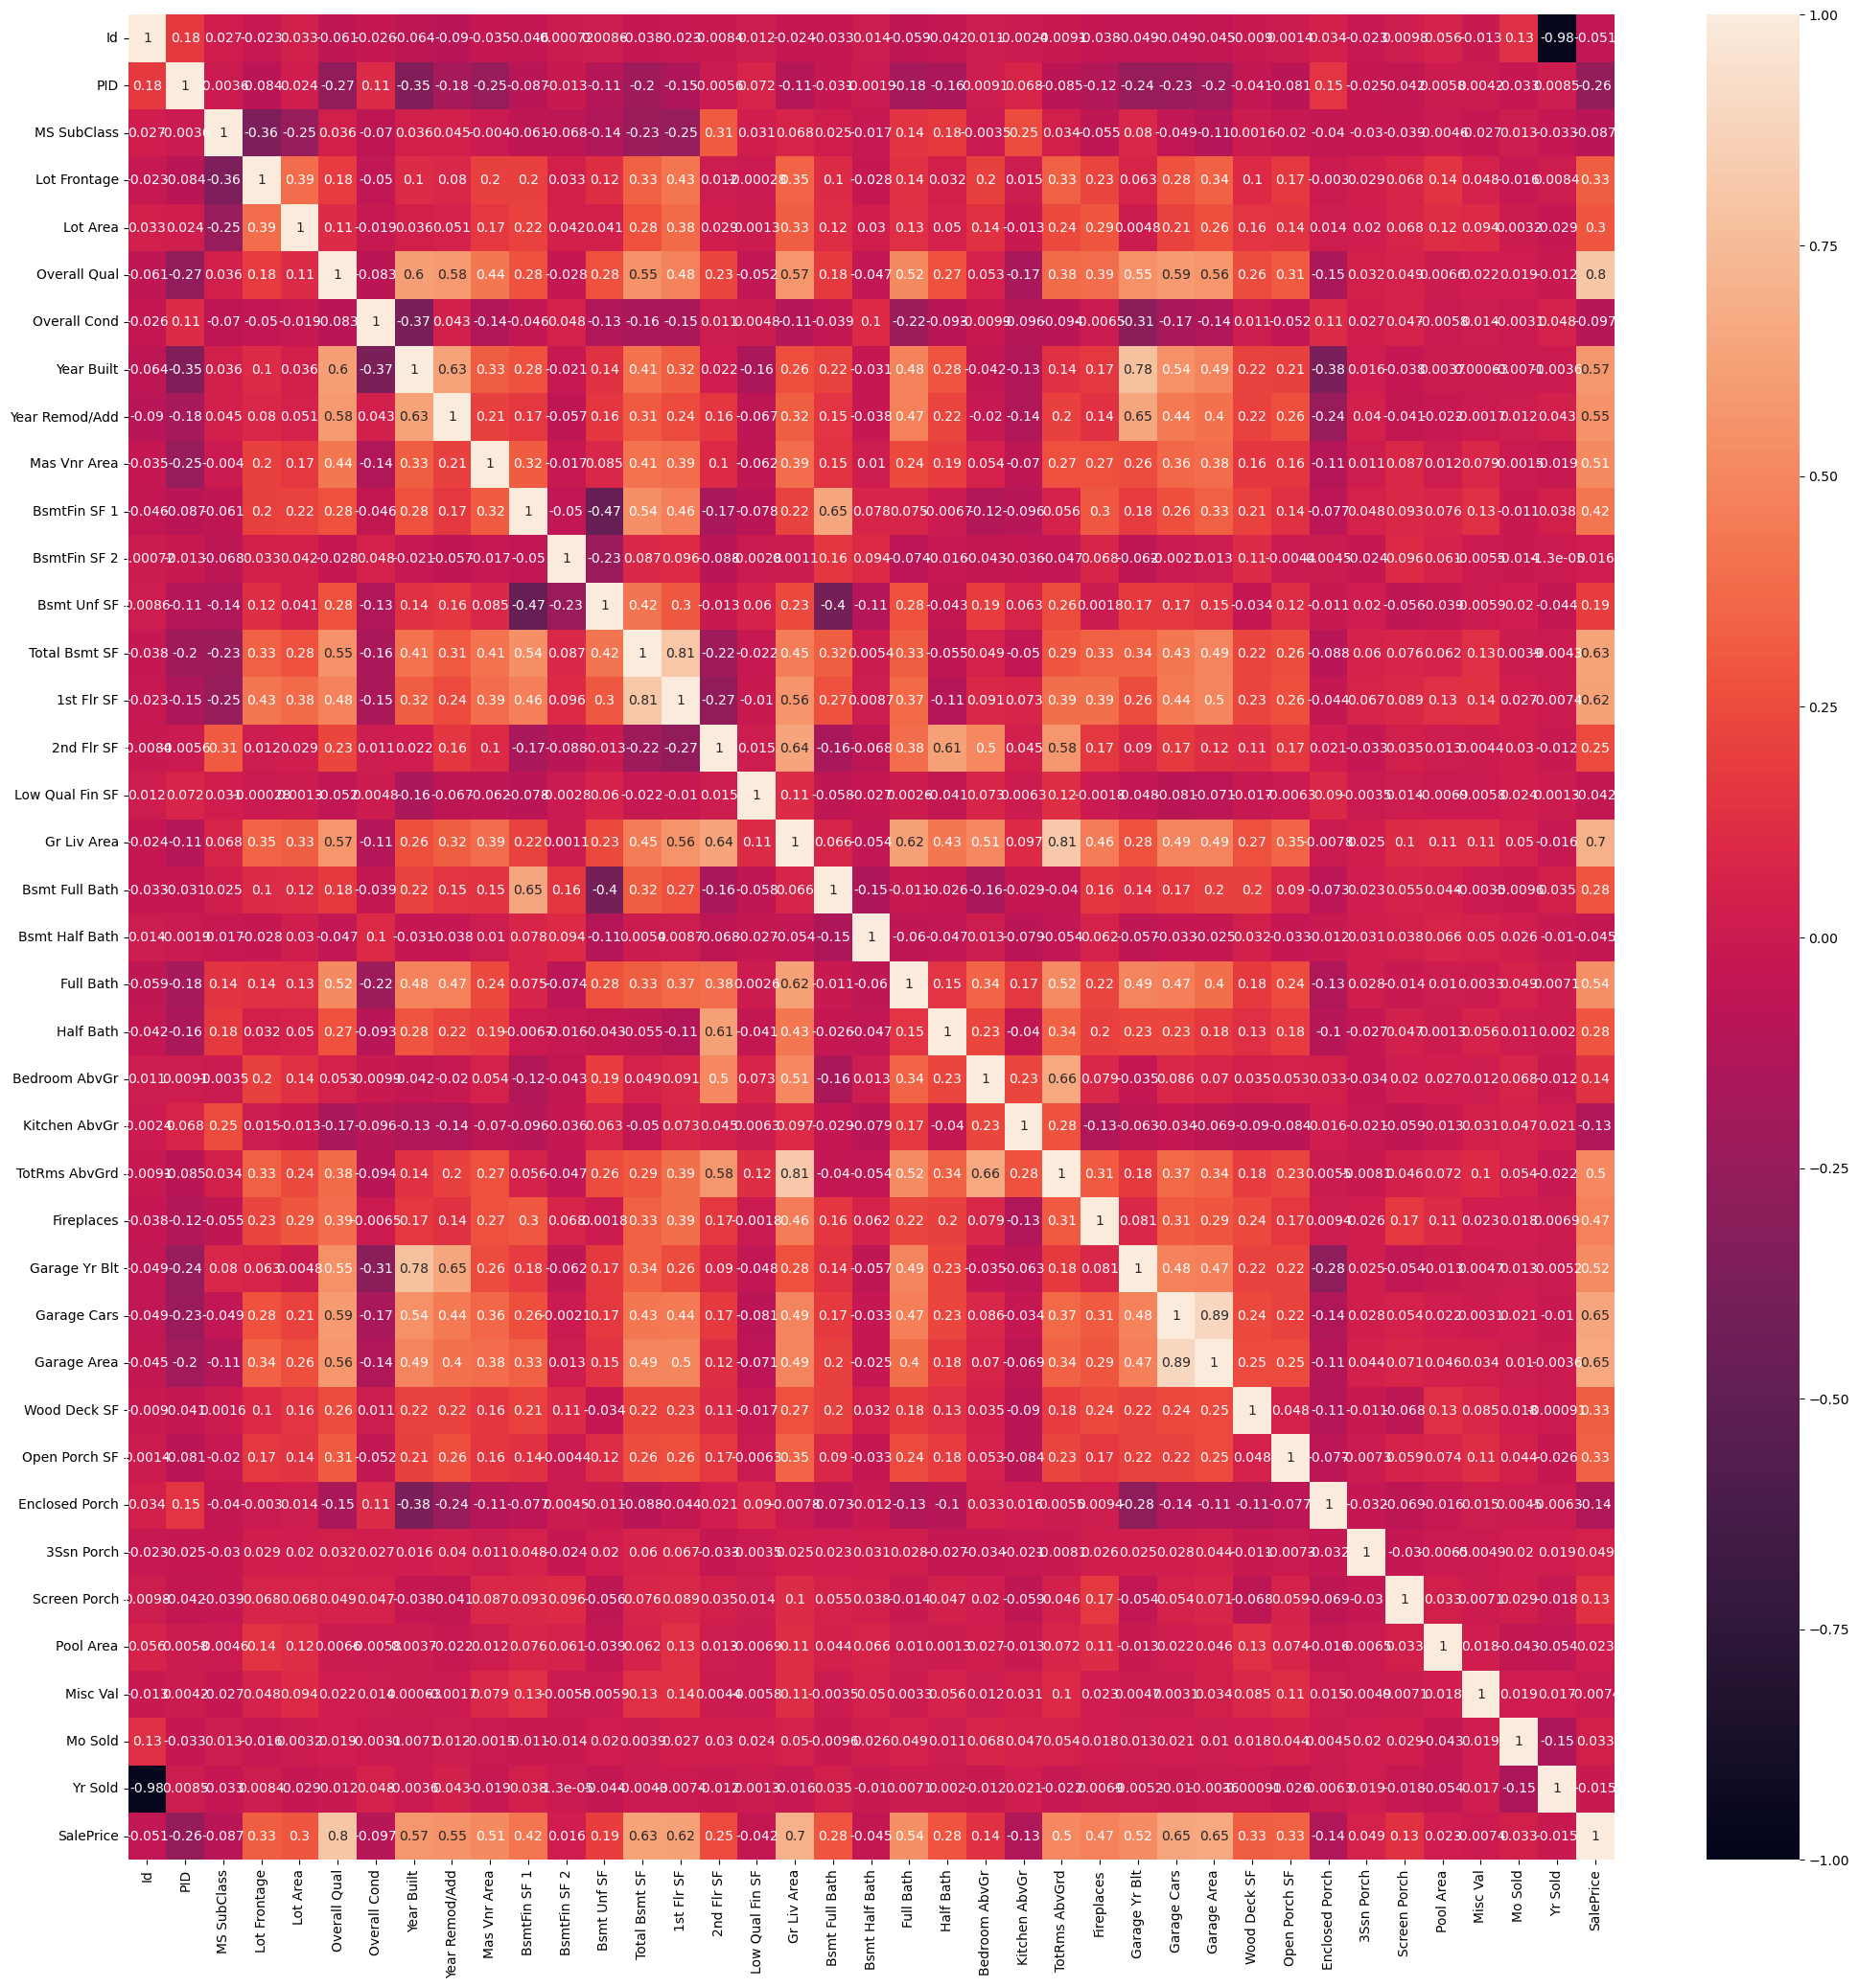

In [16]:
#Training Data Heat Map

#Make large enough to be legible
plt.figure(figsize = (25,25))

sns.heatmap(df.corr(numeric_only=True), annot = True, vmin=-1, vmax=1);

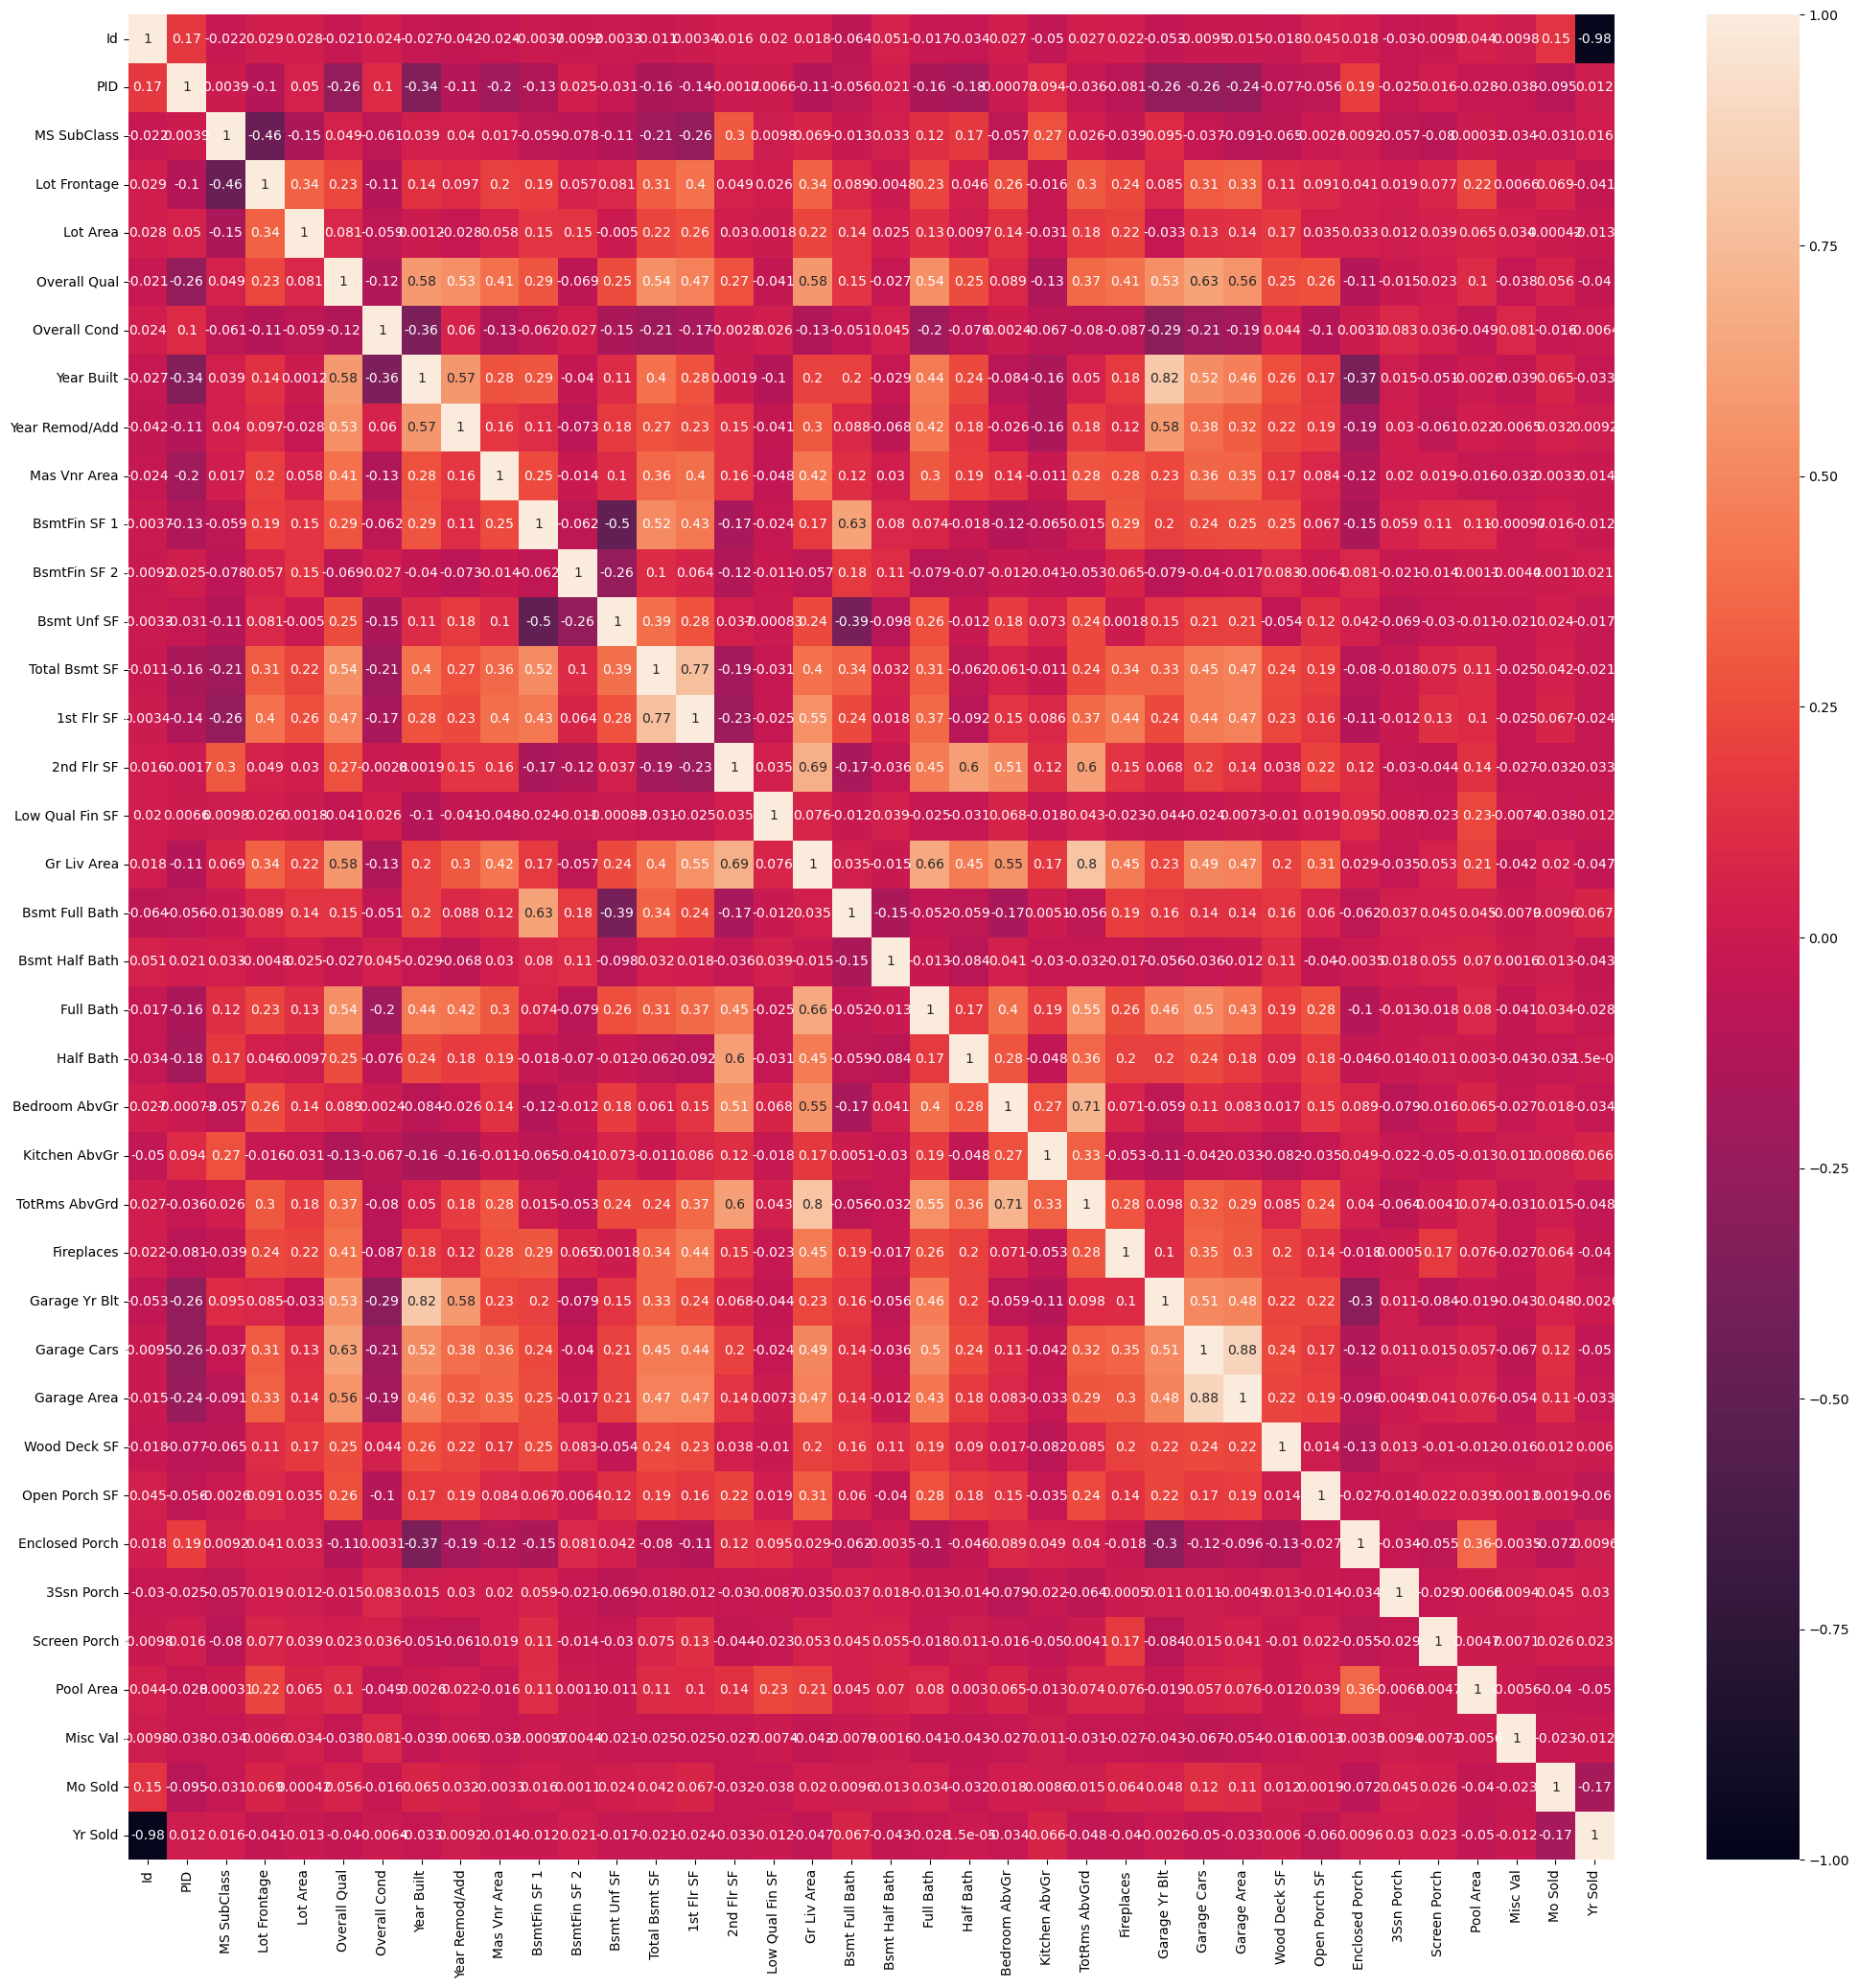

In [17]:
# Testing Data Heat Map

#Make large enough to be legible
plt.figure(figsize = (25,25))

sns.heatmap(kaggle_data.corr(numeric_only=True), annot = True, vmin=-1, vmax=1);

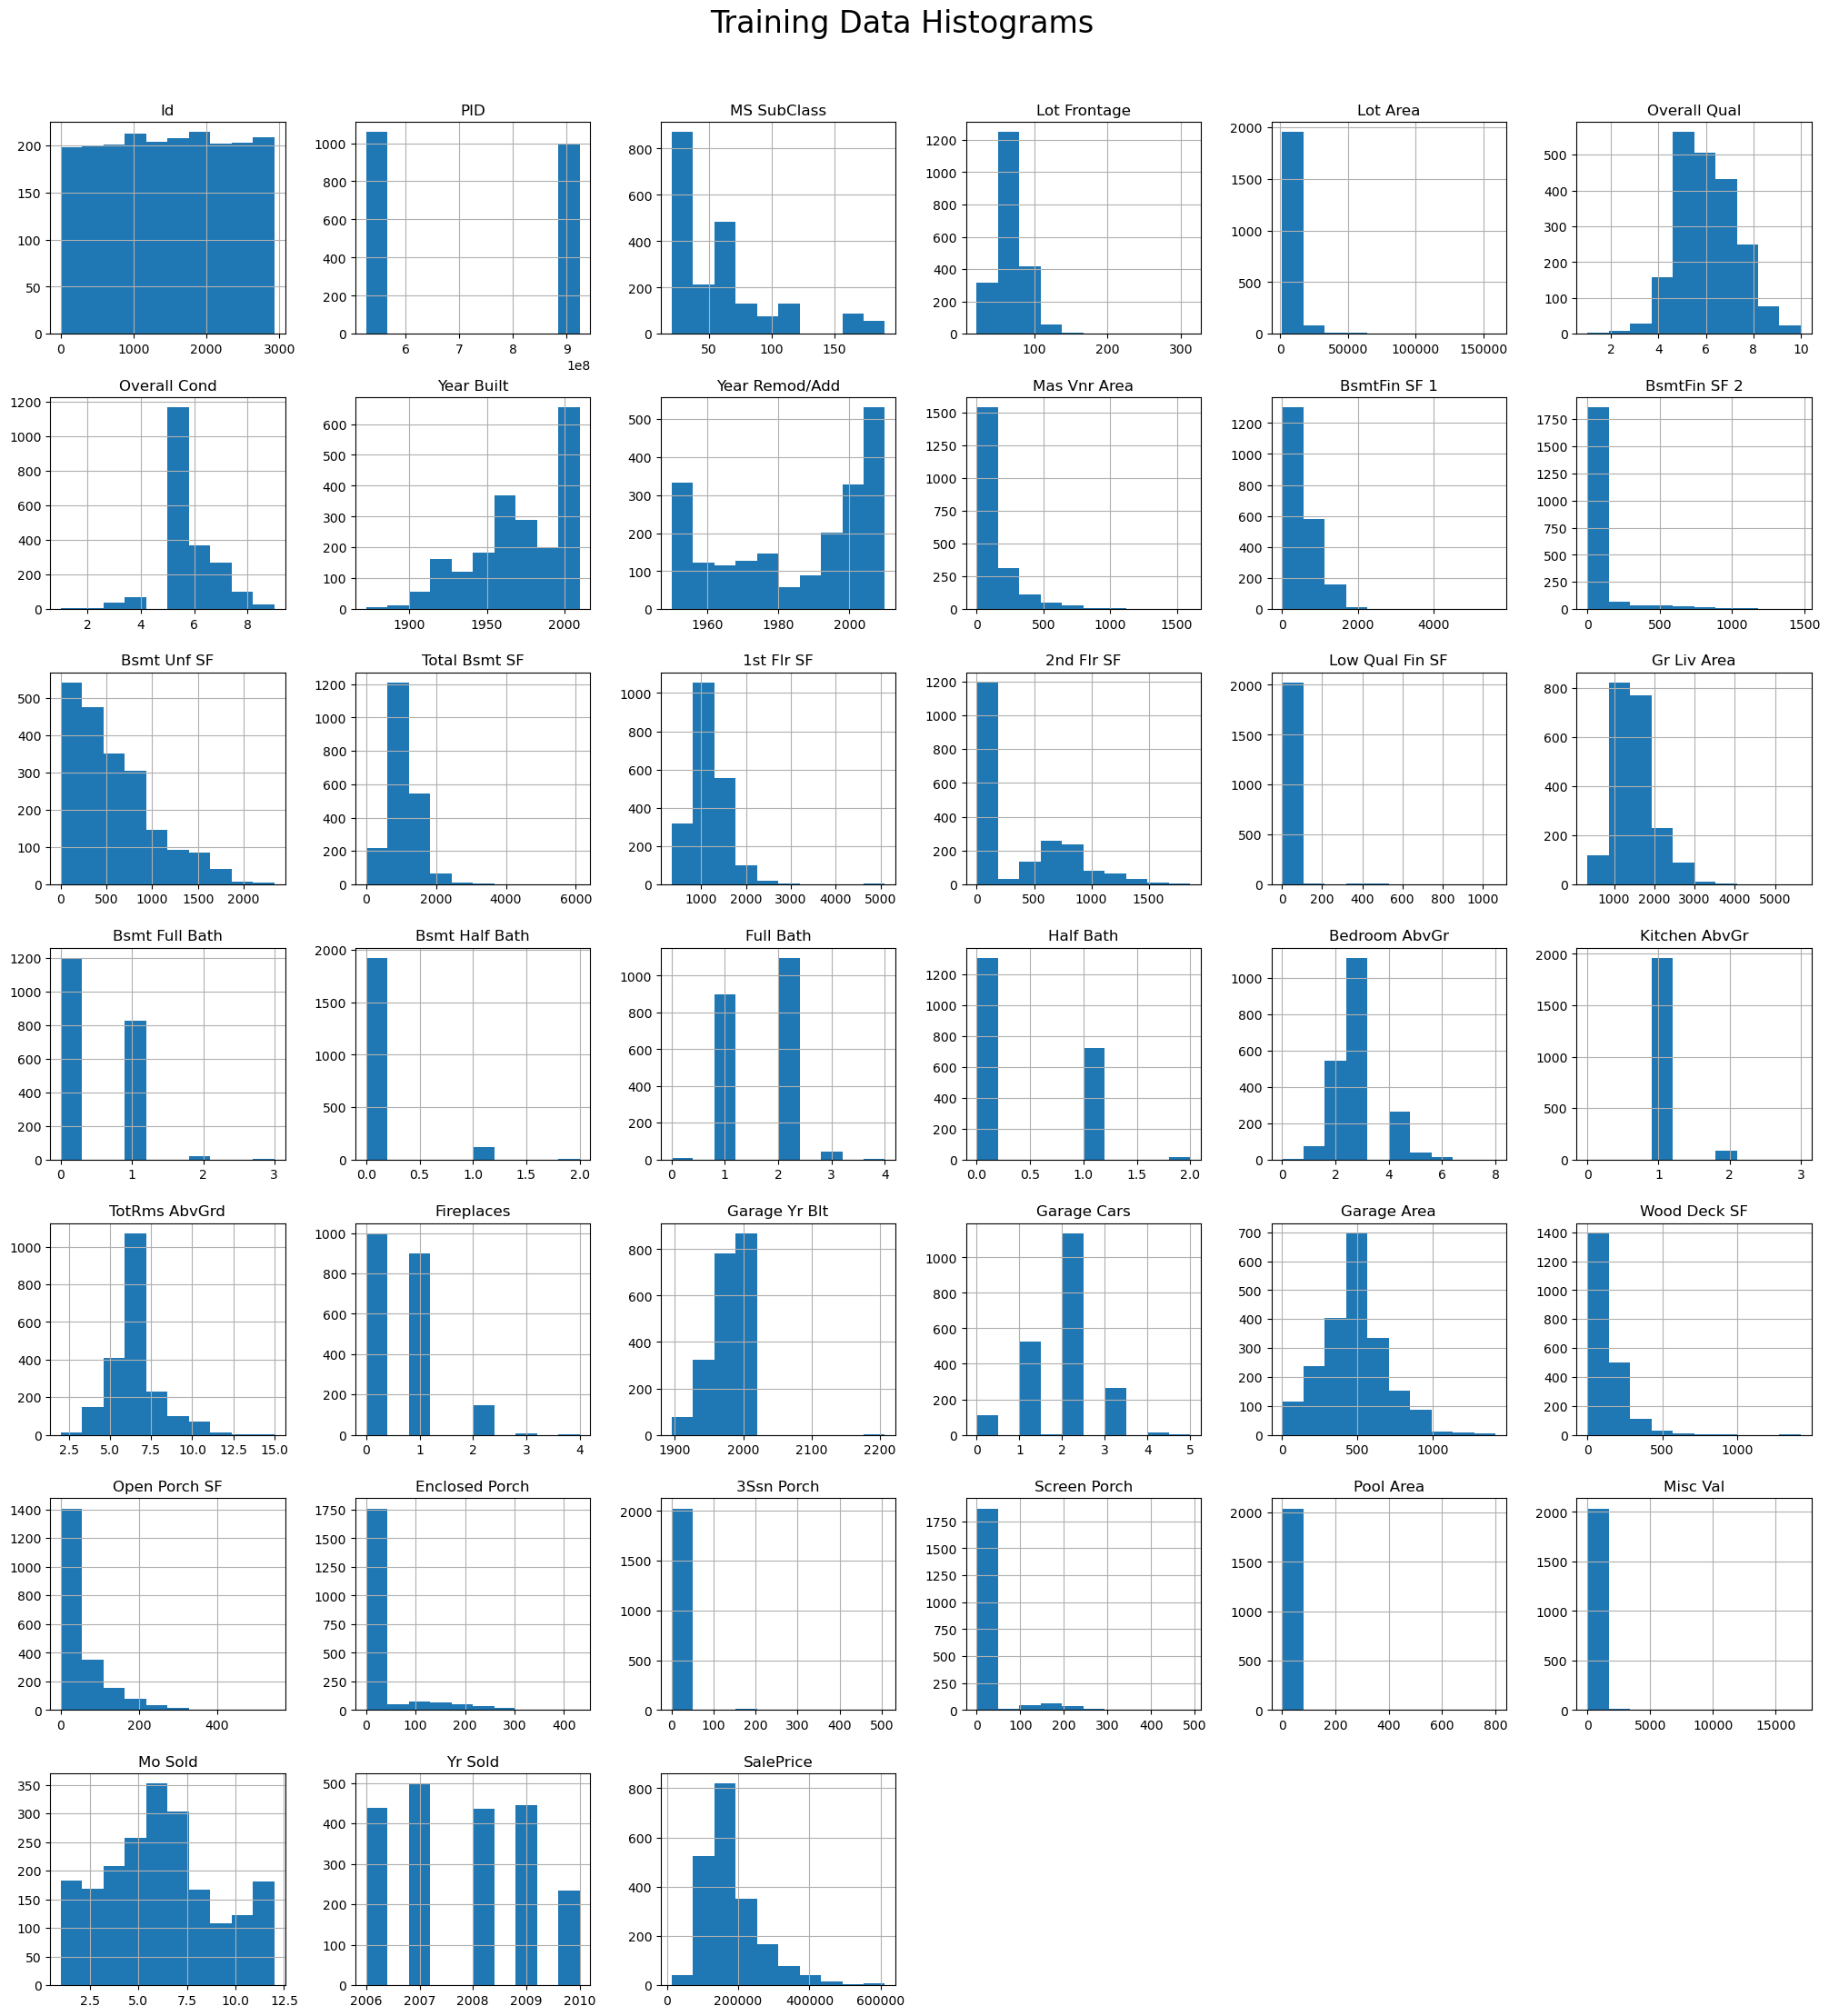

In [18]:
# Looking at histograms and prioritizing those variables with normal distributions
# Compare units on X axis with the dictionary units and the Y-Axis units are frequency (count)

df.hist(figsize=(25, 25))
plt.suptitle('Training Data Histograms', fontsize=24)
plt.subplots_adjust(top=0.93)  # You can adjust the 'top' parameter to change the space
plt.rc('axes', titlesize=22, labelsize=22)

plt.show()

In [19]:
df['After 2000'] = (df['Year Built'] >= 2000) | (df['Year Remod/Add'] >= 2000)
print(df['After 2000'].value_counts())

kaggle_data['After 2000'] = (df['Year Built'] >= 2000) | (df['Year Remod/Add'] >= 2000)
print(kaggle_data['After 2000'].value_counts())

After 2000
False    1289
True      762
Name: count, dtype: int64
After 2000
False    551
True     327
Name: count, dtype: int64


In [20]:
# All Categorical Data

non_numeric_columns = df.select_dtypes(exclude='number').columns

print(non_numeric_columns)

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'After 2000'],
      dtype='object')


### Dummifying Relevant Variables

In [21]:
# Start with 'Heating' then do 'Heating QC','Central Air','Electrical','Kitchen Qual','Functional'

In [22]:
categorical_columns = ['Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional','Exterior 1st','Exterior 2nd']
dummy_columns = pd.get_dummies(df, columns=categorical_columns)

In [23]:
df_combined = pd.concat([df, dummy_columns], axis=1)

In [24]:
df_combined

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL       69.0552     13517   Pave   
1      544  531379050           60        RL       43.0000     11492   Pave   
2      153  535304180           20        RL       68.0000      7922   Pave   
3      318  916386060           60        RL       73.0000      9802   Pave   
4      255  906425045           50        RL       82.0000     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL       79.0000     11449   Pave   
2047   785  905377130           30        RL       69.0552     12342   Pave   
2048   916  909253010           50        RL       57.0000      7558   Pave   
2049   639  535179160           20        RL       80.0000     10400   Pave   
2050    10  527162130           60        RL       60.0000      7500   Pave   

     Alley Lot Shape Land Contour  ... Exterior 2nd_CmentBd  \
0      NaN       IR1          Lvl  ...                False   
1      NaN       IR1          Lvl  ...                False   
2      NaN       Reg          Lvl  ...                False   
3      NaN       Reg          Lvl  ...                False   
4      NaN       IR1          Lvl  ...                False   
...    ...       ...          ...  ...                  ...   
2046   NaN       IR1          HLS  ...                False   
2047   NaN       IR1          Lvl  ...                False   
2048   NaN       Reg          Bnk  ...                False   
2049   NaN       Reg          Lvl  ...                False   
2050   NaN       Reg          Lvl  ...                False   

     Exterior 2nd_HdBoard Exterior 2nd_ImStucc Exterior 2nd_MetalSd  \
0                   False                False                False   
1                   False                False                False   
2                   False                False                False   
3                   False                False                False   
4                   False                False                False   
...                   ...                  ...                  ...   
2046                False                False                False   
2047                False                False                False   
2048                False                False                False   
2049                False                False                False   
2050                False                False                False   

     Exterior 2nd_Plywood Exterior 2nd_Stone Exterior 2nd_Stucco  \
0                    True              False               False   
1                   False              False               False   
2                   False              False               False   
3                   False              False               False   
4                    True              False               False   
...                   ...                ...                 ...   
2046                False              False               False   
2047                False              False               False   
2048                False               True               False   
2049                 True              False               False   
2050                False              False               False   

     Exterior 2nd_VinylSd  Exterior 2nd_Wd Sdng  Exterior 2nd_Wd Shng  
0                   False                 False                 False  
1                    True                 False                 False  
2                    True                 False                 False  
3                    True                 False                 False  
4                   False                 False                 False  
...                   ...                   ...                   ...  
2046                 True                 False                 False  
2047                 True                 False         

In [25]:
# Kitchen Quality
df['Kitchen Qual_Ex'] = df_combined['Kitchen Qual_Ex']
df['Kitchen Qual_Fa'] = df_combined['Kitchen Qual_Fa']
df['Kitchen Qual_Gd'] = df_combined['Kitchen Qual_Gd']
df['Kitchen Qual_TA'] = df_combined['Kitchen Qual_TA']

In [26]:
# Heating Quality
df['Heating QC_Ex'] = df_combined['Heating QC_Ex']
df['Heating QC_Fa'] = df_combined['Heating QC_Fa']
df['Heating QC_Gd'] = df_combined['Heating QC_Gd']
df['Heating QC_TA'] = df_combined['Heating QC_TA']

In [27]:
# Electrical Fuses - Do not Use
# df['Electrical_FuseA'] = df_combined['Electrical_FuseA']
# df['Electrical_FuseF'] = df_combined['Electrical_FuseF']
# df['Electrical_FuseP'] = df_combined['Electrical_FuseP']
# df['Electrical_SBrkr'] = df_combined['Electrical_SBrkr']

In [28]:
columns_to_add = ['Exterior 1st_AsbShng', 'Exterior 1st_AsphShn', 'Exterior 1st_BrkComm', 'Exterior 1st_BrkFace', 'Exterior 1st_CBlock', 'Exterior 1st_CemntBd', 'Exterior 1st_HdBoard', 'Exterior 1st_ImStucc', 'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_Stone', 'Exterior 1st_Stucco', 'Exterior 1st_VinylSd', 'Exterior 1st_Wd Sdng', 'Exterior 1st_WdShing', 'Exterior 2nd_AsbShng', 'Exterior 2nd_AsphShn', 'Exterior 2nd_Brk Cmn', 'Exterior 2nd_BrkFace', 'Exterior 2nd_CBlock', 'Exterior 2nd_CmentBd', 'Exterior 2nd_HdBoard', 'Exterior 2nd_ImStucc', 'Exterior 2nd_MetalSd', 'Exterior 2nd_Plywood', 'Exterior 2nd_Stone', 'Exterior 2nd_Stucco', 'Exterior 2nd_VinylSd', 'Exterior 2nd_Wd Sdng', 'Exterior 2nd_Wd Shng']

# Add each column from df_combined to df
for column in columns_to_add:
    df[column] = df_combined[column]

In [29]:
categorical_columns = ['Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional','Exterior 1st','Exterior 2nd']
dummy_columns = pd.get_dummies(kaggle_data, columns=categorical_columns)

# Concatenate the dummy columns with the original DataFrame
kaggle_data_combined = pd.concat([kaggle_data, dummy_columns], axis=1)

# Display the combined DataFrame
kaggle_data_combined

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    2658  902301120          190        RM     69.000000      9142   Pave   
1    2718  905108090           90        RL     69.545961      9662   Pave   
2    2414  528218130           60        RL     58.000000     17104   Pave   
3    1989  902207150           30        RM     60.000000      8520   Pave   
4     625  535105100           20        RL     69.545961      9500   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
873  1662  527377110           60        RL     80.000000      8000   Pave   
874  1234  535126140           60        RL     90.000000     14670   Pave   
875  1373  904100040           20        RL     55.000000      8250   Pave   
876  1672  527425140           20        RL     60.000000      9000   Pave   
877  1939  535327160           20        RL     70.000000      8400   Pave   

    Alley Lot Shape Land Contour  ... Exterior 2nd_HdBoard  \
0    Grvl       Reg          Lvl  ...                False   
1     NaN       IR1          Lvl  ...                False   
2     NaN       IR1          Lvl  ...                False   
3     NaN       Reg          Lvl  ...                False   
4     NaN       IR1          Lvl  ...                False   
..    ...       ...          ...  ...                  ...   
873   NaN       Reg          Lvl  ...                 True   
874   NaN       Reg          Lvl  ...                False   
875   NaN       Reg          Lvl  ...                 True   
876   NaN       Reg          Lvl  ...                 True   
877   NaN       Reg          Lvl  ...                False   

    Exterior 2nd_ImStucc Exterior 2nd_MetalSd Exterior 2nd_Other  \
0                  False                False              False   
1                  False                False              False   
2                  False                False              False   
3                  False                False              False   
4                  False                False              False   
..                   ...                  ...                ...   
873                False                False              False   
874                False                False              False   
875                False                False              False   
876                False                False              False   
877                False                 True              False   

    Exterior 2nd_Plywood Exterior 2nd_PreCast Exterior 2nd_Stucco  \
0                  False                False               False   
1                   True                False               False   
2                  False                False               False   
3                  False                False               False   
4                   True                False               False   
..                   ...                  ...                 ...   
873                False                False               False   
874                False                False               False   
875                False                False               False   
876                False                False               False   
877                False                False               False   

    Exterior 2nd_VinylSd  Exterior 2nd_Wd Sdng  Exterior 2nd_Wd Shng  
0                  False                 False                 False  
1                  False                 False                 False  
2                   True                 False                 False  
3                  False                  True                 False  
4                  False                 False                 False  
..                   ...                   ...                   ...  
873                False                 False                 False  
874                 True                 False                 False  
875                False                

In [30]:
# Kitchen Quality
kaggle_data['Kitchen Qual_Ex'] = kaggle_data_combined['Kitchen Qual_Ex']
kaggle_data['Kitchen Qual_Fa'] = kaggle_data_combined['Kitchen Qual_Fa']
kaggle_data['Kitchen Qual_Gd'] = kaggle_data_combined['Kitchen Qual_Gd']
kaggle_data['Kitchen Qual_TA'] = kaggle_data_combined['Kitchen Qual_TA']

In [31]:
# Heating Quality
kaggle_data['Heating QC_Ex'] = kaggle_data_combined['Heating QC_Ex']
kaggle_data['Heating QC_Fa'] = kaggle_data_combined['Heating QC_Fa']
kaggle_data['Heating QC_Gd'] = kaggle_data_combined['Heating QC_Gd']
kaggle_data['Heating QC_TA'] = kaggle_data_combined['Heating QC_TA']

In [32]:
# Electrical Fuses - Do not Use
# kaggle_data['Electrical_FuseA'] = kaggle_data_combined['Electrical_FuseA']
# kaggle_data['Electrical_FuseF'] = kaggle_data_combined['Electrical_FuseF']
# kaggle_data['Electrical_FuseP'] = kaggle_data_combined['Electrical_FuseP']
# kaggle_data['Electrical_SBrkr'] = kaggle_data_combined['Electrical_SBrkr']

In [33]:
columns_to_add_kaggle = ['Exterior 1st_AsbShng', 'Exterior 1st_AsphShn', 'Exterior 1st_BrkComm', 'Exterior 1st_BrkFace', 'Exterior 1st_CemntBd', 'Exterior 1st_HdBoard', 'Exterior 1st_ImStucc', 'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_Stone', 'Exterior 1st_Stucco', 'Exterior 1st_VinylSd', 'Exterior 1st_Wd Sdng', 'Exterior 1st_WdShing', 'Exterior 2nd_AsbShng', 'Exterior 2nd_AsphShn', 'Exterior 2nd_Brk Cmn', 'Exterior 2nd_BrkFace', 'Exterior 2nd_CBlock', 'Exterior 2nd_CmentBd', 'Exterior 2nd_HdBoard', 'Exterior 2nd_ImStucc', 'Exterior 2nd_MetalSd', 'Exterior 2nd_Plywood', 'Exterior 2nd_Stone', 'Exterior 2nd_Stucco', 'Exterior 2nd_VinylSd', 'Exterior 2nd_Wd Sdng', 'Exterior 2nd_Wd Shng']

columns_to_exclude = ['Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_Stone','Exterior 2nd_Stone']

# Add each column from df_combined to kaggle_data, excluding specified columns
for column in columns_to_add_kaggle:
    if column not in columns_to_exclude:
        kaggle_data[column] = kaggle_data_combined[column]

In [34]:
df

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL       69.0552     13517   Pave   
1      544  531379050           60        RL       43.0000     11492   Pave   
2      153  535304180           20        RL       68.0000      7922   Pave   
3      318  916386060           60        RL       73.0000      9802   Pave   
4      255  906425045           50        RL       82.0000     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL       79.0000     11449   Pave   
2047   785  905377130           30        RL       69.0552     12342   Pave   
2048   916  909253010           50        RL       57.0000      7558   Pave   
2049   639  535179160           20        RL       80.0000     10400   Pave   
2050    10  527162130           60        RL       60.0000      7500   Pave   

     Alley Lot Shape Land Contour  ... Exterior 2nd_CmentBd  \
0      NaN       IR1          Lvl  ...                False   
1      NaN       IR1          Lvl  ...                False   
2      NaN       Reg          Lvl  ...                False   
3      NaN       Reg          Lvl  ...                False   
4      NaN       IR1          Lvl  ...                False   
...    ...       ...          ...  ...                  ...   
2046   NaN       IR1          HLS  ...                False   
2047   NaN       IR1          Lvl  ...                False   
2048   NaN       Reg          Bnk  ...                False   
2049   NaN       Reg          Lvl  ...                False   
2050   NaN       Reg          Lvl  ...                False   

     Exterior 2nd_HdBoard Exterior 2nd_ImStucc Exterior 2nd_MetalSd  \
0                   False                False                False   
1                   False                False                False   
2                   False                False                False   
3                   False                False                False   
4                   False                False                False   
...                   ...                  ...                  ...   
2046                False                False                False   
2047                False                False                False   
2048                False                False                False   
2049                False                False                False   
2050                False                False                False   

     Exterior 2nd_Plywood Exterior 2nd_Stone Exterior 2nd_Stucco  \
0                    True              False               False   
1                   False              False               False   
2                   False              False               False   
3                   False              False               False   
4                    True              False               False   
...                   ...                ...                 ...   
2046                False              False               False   
2047                False              False               False   
2048                False               True               False   
2049                 True              False               False   
2050                False              False               False   

     Exterior 2nd_VinylSd  Exterior 2nd_Wd Sdng  Exterior 2nd_Wd Shng  
0                   False                 False                 False  
1                    True                 False                 False  
2                    True                 False                 False  
3                    True                 False                 False  
4                   False                 False                 False  
...                   ...                   ...                   ...  
2046                 True                 False                 False  
2047                 True                 False         

In [35]:
kaggle_data

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    2658  902301120          190        RM     69.000000      9142   Pave   
1    2718  905108090           90        RL     69.545961      9662   Pave   
2    2414  528218130           60        RL     58.000000     17104   Pave   
3    1989  902207150           30        RM     60.000000      8520   Pave   
4     625  535105100           20        RL     69.545961      9500   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
873  1662  527377110           60        RL     80.000000      8000   Pave   
874  1234  535126140           60        RL     90.000000     14670   Pave   
875  1373  904100040           20        RL     55.000000      8250   Pave   
876  1672  527425140           20        RL     60.000000      9000   Pave   
877  1939  535327160           20        RL     70.000000      8400   Pave   

    Alley Lot Shape Land Contour  ... Exterior 2nd_CBlock  \
0    Grvl       Reg          Lvl  ...               False   
1     NaN       IR1          Lvl  ...               False   
2     NaN       IR1          Lvl  ...               False   
3     NaN       Reg          Lvl  ...               False   
4     NaN       IR1          Lvl  ...               False   
..    ...       ...          ...  ...                 ...   
873   NaN       Reg          Lvl  ...               False   
874   NaN       Reg          Lvl  ...               False   
875   NaN       Reg          Lvl  ...               False   
876   NaN       Reg          Lvl  ...               False   
877   NaN       Reg          Lvl  ...               False   

    Exterior 2nd_CmentBd Exterior 2nd_HdBoard Exterior 2nd_ImStucc  \
0                  False                False                False   
1                  False                False                False   
2                  False                False                False   
3                  False                False                False   
4                  False                False                False   
..                   ...                  ...                  ...   
873                False                 True                False   
874                False                False                False   
875                False                 True                False   
876                False                 True                False   
877                False                False                False   

    Exterior 2nd_MetalSd Exterior 2nd_Plywood Exterior 2nd_Stucco  \
0                  False                False               False   
1                  False                 True               False   
2                  False                False               False   
3                  False                False               False   
4                  False                 True               False   
..                   ...                  ...                 ...   
873                False                False               False   
874                False                False               False   
875                False                False               False   
876                False                False               False   
877                 True                False               False   

    Exterior 2nd_VinylSd  Exterior 2nd_Wd Sdng  Exterior 2nd_Wd Shng  
0                  False                 False                 False  
1                  False                 False                 False  
2                   True                 False                 False  
3                  False                  True                 False  
4                  False                 False                 False  
..                   ...                   ...                   ...  
873                False                 False                 False  
874                 True                 False                 False  
875                False    

In [36]:
kaggle_data_combined.shape

(878, 208)

In [37]:
# Dummy variable interaction with above grade living area

result = df.groupby(['Gr Liv Area', 'After 2000'])['SalePrice'].mean()
print(result)

Gr Liv Area  After 2000
334          False          39300.0
438          False          60000.0
480          False          35311.0
492          False          61500.0
498          False          35000.0
                             ...   
3608         False         475000.0
3672         False         415000.0
3820         False         284700.0
5095         True          183850.0
5642         True          160000.0
Name: SalePrice, Length: 1327, dtype: float64


In [38]:
#Take a look at the different values for external quality of the home, use these for a dummy variable column.
df['Exter Qual'].value_counts()

Exter Qual
TA    1247
Gd     697
Ex      81
Fa      26
Name: count, dtype: int64

In [39]:
# Creating a feature for external quality

df['Exter Qual'] = df['Exter Qual'].isin(['Gd', 'Ex'])

# Convert boolean values to 1 and 0
df['Exter Qual'] = df['Exter Qual'].astype(int)

kaggle_data['Exter Qual'] = kaggle_data['Exter Qual'].isin(['Gd', 'Ex'])

# Convert boolean values to 1 and 0
kaggle_data['Exter Qual'] = kaggle_data['Exter Qual'].astype(int)

In [40]:
df['Gr Liv Area Times Garage Area'] = df['Gr Liv Area'] * df['Garage Area']
kaggle_data['Gr Liv Area Times Garage Area'] = kaggle_data['Gr Liv Area'] * kaggle_data['Garage Area']

In [41]:
df['Quality Factor'] = df['Overall Qual'] * df['Exter Qual']
kaggle_data['Quality Factor'] = kaggle_data['Overall Qual'] * kaggle_data['Exter Qual']

In [42]:
# Creating a feature for external quality
df_combined['Exter Qual'] = df_combined['Exter Qual'].isin(['Gd', 'Ex'])

# Convert boolean values to 1 and 0
df_combined['Exter Qual'] = df_combined['Exter Qual'].astype(int)

kaggle_data_combined['Exter Qual'] = kaggle_data_combined['Exter Qual'].isin(['Gd', 'Ex'])

# Convert boolean values to 1 and 0
kaggle_data_combined['Exter Qual'] = kaggle_data_combined['Exter Qual'].astype(int)


In [43]:
# Specify the columns to add from df to df_combined
columns_to_add = ['Gr Liv Area Times Garage Area', 'Quality Factor']

# Merge df_combined with the selected columns from df
df_combined = pd.merge(df_combined, df[columns_to_add], left_index=True, right_index=True, how='left', suffixes=('', '_df'))

In [44]:
# Display the updated df_combined DataFrame
df_combined

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL       69.0552     13517   Pave   
1      544  531379050           60        RL       43.0000     11492   Pave   
2      153  535304180           20        RL       68.0000      7922   Pave   
3      318  916386060           60        RL       73.0000      9802   Pave   
4      255  906425045           50        RL       82.0000     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL       79.0000     11449   Pave   
2047   785  905377130           30        RL       69.0552     12342   Pave   
2048   916  909253010           50        RL       57.0000      7558   Pave   
2049   639  535179160           20        RL       80.0000     10400   Pave   
2050    10  527162130           60        RL       60.0000      7500   Pave   

     Alley Lot Shape Land Contour  ... Exterior 2nd_ImStucc  \
0      NaN       IR1          Lvl  ...                False   
1      NaN       IR1          Lvl  ...                False   
2      NaN       Reg          Lvl  ...                False   
3      NaN       Reg          Lvl  ...                False   
4      NaN       IR1          Lvl  ...                False   
...    ...       ...          ...  ...                  ...   
2046   NaN       IR1          HLS  ...                False   
2047   NaN       IR1          Lvl  ...                False   
2048   NaN       Reg          Bnk  ...                False   
2049   NaN       Reg          Lvl  ...                False   
2050   NaN       Reg          Lvl  ...                False   

     Exterior 2nd_MetalSd Exterior 2nd_Plywood Exterior 2nd_Stone  \
0                   False                 True              False   
1                   False                False              False   
2                   False                False              False   
3                   False                False              False   
4                   False                 True              False   
...                   ...                  ...                ...   
2046                False                False              False   
2047                False                False              False   
2048                False                False               True   
2049                False                 True              False   
2050                False                False              False   

     Exterior 2nd_Stucco Exterior 2nd_VinylSd Exterior 2nd_Wd Sdng  \
0                  False                False                False   
1                  False                 True                False   
2                  False                 True                False   
3                  False                 True                False   
4                  False                False                False   
...                  ...                  ...                  ...   
2046               False                 True                False   
2047               False                 True                False   
2048               False                False                False   
2049               False                False                False   
2050               False                 True                False   

     Exterior 2nd_Wd Shng  Gr Liv Area Times Garage Area  Quality Factor  
0                   False                       702525.0               6  
1                   False                      1186198.0               7  
2                   False                       260022.0               0  
3                   False                       577600.0               0  
4                   False                       699380.0               0  
...                   ...                            ...             ...  
2046                False                       898560.0               8  
2047                False       

In [45]:
# Specify the columns to add from kaggle_data to kaggle_data_combined
columns_to_add_kaggle = ['Gr Liv Area Times Garage Area', 'Quality Factor']

# Merge kaggle_data_combined with the selected columns from kaggle_data
kaggle_data_combined = pd.merge(kaggle_data_combined, kaggle_data[columns_to_add_kaggle], left_index=True, right_index=True, how='left', suffixes=('', '_kaggle'))

In [46]:
# Display the updated kaggle_data_combined DataFrame
kaggle_data_combined

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    2658  902301120          190        RM     69.000000      9142   Pave   
1    2718  905108090           90        RL     69.545961      9662   Pave   
2    2414  528218130           60        RL     58.000000     17104   Pave   
3    1989  902207150           30        RM     60.000000      8520   Pave   
4     625  535105100           20        RL     69.545961      9500   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
873  1662  527377110           60        RL     80.000000      8000   Pave   
874  1234  535126140           60        RL     90.000000     14670   Pave   
875  1373  904100040           20        RL     55.000000      8250   Pave   
876  1672  527425140           20        RL     60.000000      9000   Pave   
877  1939  535327160           20        RL     70.000000      8400   Pave   

    Alley Lot Shape Land Contour  ... Exterior 2nd_MetalSd Exterior 2nd_Other  \
0    Grvl       Reg          Lvl  ...                False              False   
1     NaN       IR1          Lvl  ...                False              False   
2     NaN       IR1          Lvl  ...                False              False   
3     NaN       Reg          Lvl  ...                False              False   
4     NaN       IR1          Lvl  ...                False              False   
..    ...       ...          ...  ...                  ...                ...   
873   NaN       Reg          Lvl  ...                False              False   
874   NaN       Reg          Lvl  ...                False              False   
875   NaN       Reg          Lvl  ...                False              False   
876   NaN       Reg          Lvl  ...                False              False   
877   NaN       Reg          Lvl  ...                 True              False   

    Exterior 2nd_Plywood Exterior 2nd_PreCast Exterior 2nd_Stucco  \
0                  False                False               False   
1                   True                False               False   
2                  False                False               False   
3                  False                False               False   
4                   True                False               False   
..                   ...                  ...                 ...   
873                False                False               False   
874                False                False               False   
875                False                False               False   
876                False                False               False   
877                False                False               False   

    Exterior 2nd_VinylSd Exterior 2nd_Wd Sdng Exterior 2nd_Wd Shng  \
0                  False                False                False   
1                  False                False                False   
2                   True                False                False   
3                  False                 True                False   
4                  False                False                False   
..                   ...                  ...                  ...   
873                False                False                False   
874                 True                False                False   
875                False                False                False   
876                False                False                False   
877                False                False                False   

     Gr Liv Area Times Garage Area  Quality Factor  
0                           848320               0  
1                          1140860               0  
2                           637296               7  
3                           464640               5  
4                           716516               0  
..                             ...             ...  
873                         915976               0  
874

### Use the top numerical variables with best $\text{R}^2$ between Sale Price.

In [47]:
print(df.corr(numeric_only=True)['SalePrice'].sort_values())

Kitchen Qual_TA                 -0.540860
Heating QC_TA                   -0.343542
PID                             -0.255052
Exterior 1st_Wd Sdng            -0.191734
Exterior 2nd_Wd Sdng            -0.172971
                                   ...   
Gr Liv Area                      0.697038
Quality Factor                   0.710781
Gr Liv Area Times Garage Area    0.754707
Overall Qual                     0.800207
SalePrice                        1.000000
Name: SalePrice, Length: 81, dtype: float64


In [48]:
pd.set_option('display.max_rows', None)

print(kaggle_data.corr(numeric_only=True)['Overall Qual'].sort_values())

Kitchen Qual_TA                 -0.521833
Heating QC_TA                   -0.331818
PID                             -0.261138
Heating QC_Gd                   -0.184353
Kitchen Qual_Fa                 -0.177992
Exterior 2nd_Wd Sdng            -0.156376
Exterior 1st_AsbShng            -0.153800
Exterior 2nd_AsbShng            -0.145132
Exterior 1st_MetalSd            -0.143388
Exterior 2nd_MetalSd            -0.141891
Kitchen AbvGr                   -0.134264
Exterior 1st_Wd Sdng            -0.130870
Overall Cond                    -0.122401
Enclosed Porch                  -0.113804
Heating QC_Fa                   -0.096355
Exterior 1st_HdBoard            -0.088429
Exterior 2nd_HdBoard            -0.085426
Exterior 2nd_Plywood            -0.084008
Exterior 1st_BrkComm            -0.073467
BsmtFin SF 2                    -0.069156
Exterior 1st_Plywood            -0.060189
Exterior 2nd_Stucco             -0.059514
Exterior 2nd_CBlock             -0.050594
Low Qual Fin SF                 -0

### Brief look at linearity via a pairplot 

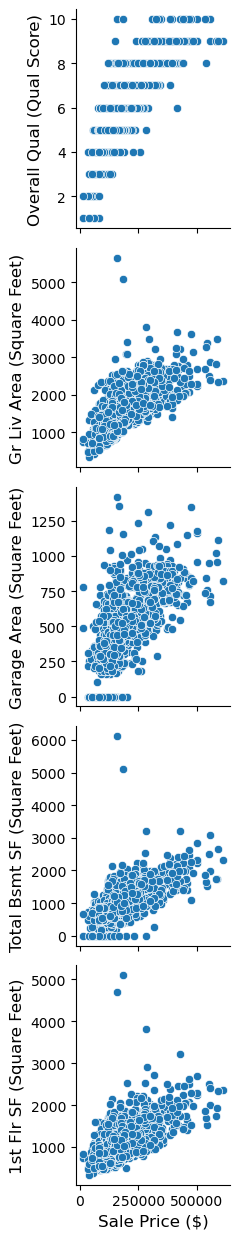

In [49]:
#Exploring linearity

pairplot = sns.pairplot(df, y_vars=['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF'], x_vars=['SalePrice'])

# Dictionary of units for each variable
units_dict = {
    'Overall Qual': 'Qual Score',
    'Gr Liv Area': 'Square Feet',
    'Garage Area': 'Square Feet',
    'Total Bsmt SF': 'Square Feet',
    '1st Flr SF': 'Square Feet',
}

# Add units to the Y-axis labels
for ax, variable in zip(pairplot.axes.flat, ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']):
    ax.set_ylabel(f"{variable} ({units_dict[variable]})", fontsize=12)
    ax.set_xlabel(f"SalePrice (Dollars)", fontsize=12)

# Add X-axis label
pairplot.set(xlabel="Sale Price ($)")
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)  # You can adjust the spacing as needed

# Show the plot
plt.show()

In [50]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour',
       ...
       'Exterior 2nd_ImStucc', 'Exterior 2nd_MetalSd', 'Exterior 2nd_Plywood',
       'Exterior 2nd_Stone', 'Exterior 2nd_Stucco', 'Exterior 2nd_VinylSd',
       'Exterior 2nd_Wd Sdng', 'Exterior 2nd_Wd Shng',
       'Gr Liv Area Times Garage Area', 'Quality Factor'],
      dtype='object', length=122)

## Training and Modeling Section With The Train.csv File Imported As `df`

In [51]:
# After 2000 is our only dummy variable
# Exter Qual is our only feature
#'Gr Liv Area Times Garage Area' is an area booster
# 'Total Bsmt SF Times 1st Flr SF' performed poorly and was deducted
#Trying Dummies 01/13/2023
#First Kitchen Quality 
#Second Heating Quality
#Third Electrical Fuses - Do Not Use
#Now try the externals: 

features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars','Total Bsmt SF',
            '1st Flr SF','Year Built','Year Remod/Add','Full Bath','Garage Yr Blt','TotRms AbvGrd',
            'Mas Vnr Area','Fireplaces','BsmtFin SF 1','Wood Deck SF','Open Porch SF',
            'After 2000','Exter Qual','Gr Liv Area Times Garage Area','Overall Qual',
            'Kitchen Qual_Ex','Kitchen Qual_Fa','Kitchen Qual_Gd','Kitchen Qual_TA',
            'Heating QC_Ex','Heating QC_Fa','Heating QC_Gd','Heating QC_TA'
           ]

X = df[features]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    train_size=0.90)

In [52]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test = ss.transform(X_test)

In [53]:
# new_frame_X_train = pd.DataFrame(X_train, columns=poly.get_feature_names_out(features))
# new_frame_X_train

In [54]:
# new_frame_X_test = pd.DataFrame(X_test, columns=poly.get_feature_names_out(features))
# new_frame_X_test

In [55]:
# Instantiate a linear regression model.
linmod = LinearRegression()

# Fit our linear regression model to the training data.
linmod.fit(X_train,y_train)

LinearRegression()

In [56]:
lasso = Lasso()

ridge = Ridge()

In [57]:
# Will not utilize lasso disregard warning of non-convergence

In [58]:
lasso.fit(X_train,y_train)

/Users/ben/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.058e+11, tolerance: 1.166e+09
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [59]:
ridge.fit(X_train,y_train)

Ridge()

In [60]:
# Print out intercept and coefficients.
print(f'Intercept: {linmod.intercept_}')
print(f'Coefficient: {linmod.coef_}')

Intercept: 182065.56104749272
Coefficient: [-2.70378906e+17  2.08640000e+04  1.20000000e+04  4.30800000e+03
  3.27400000e+03  3.73600000e+03  5.50000000e+03  4.04800000e+03
 -7.80000000e+01 -9.78000000e+02  2.59800000e+03  5.89400000e+03
  5.78400000e+03  7.09800000e+03  2.45100000e+03 -1.00000000e+01
  3.04000000e+02  5.29600000e+03 -1.06360000e+04  2.70378906e+17
  5.41154675e+15  3.15237384e+15  9.98581031e+15  1.02172365e+16
  1.00340000e+04  2.21300000e+03  5.88650000e+03  5.31600000e+03]


In [61]:
# We Go Ridge

In [62]:
#predict
prediction_lin = linmod.predict(X_test)

#actual
actual = y_test

train_score_lin = linmod.score(X_train, y_train)
test_score_lin = linmod.score(X_test, y_test)

print("The train score for lin model is {}".format(train_score_lin))
print("The test score for lin model is {}".format(test_score_lin))

The train score for lin model is 0.8311238227975448
The test score for lin model is 0.8811699851977499


In [63]:
# And same for the other models 
#predict
prediction_lasso = lasso.predict(X_test)

#actual
actual = y_test

train_score_lasso = lasso.score(X_train, y_train)
test_score_lasso = lasso.score(X_test, y_test)

print("The train score for lasso model is {}".format(train_score_lasso))
print("The test score for lasso model is {}".format(test_score_lasso))

The train score for lasso model is 0.8311411566548788
The test score for lasso model is 0.8814934614457688


In [64]:
#predict
prediction_ridge = ridge.predict(X_test)

#actual
actual = y_test

train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge = ridge.score(X_test, y_test)

print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for ridge model is 0.8311386897691468
The test score for ridge model is 0.8815296129494481


In [65]:
# Although nearly identical, we will use Ridge; model is underfit needs more fitting

# Other Fits

A look at non-linearity, polynomial features for a better characteristic equation. 

In [66]:
poly = PolynomialFeatures(degree=2,include_bias=False)

In [67]:
X_train = poly.fit_transform(X_train)

X_test = poly.transform(X_test)

Third Order term present in characteristic equation. 

In [68]:
pd.DataFrame(X_train, columns=poly.get_feature_names_out(features))

Overall Qual  Gr Liv Area  Garage Area  Garage Cars  Total Bsmt SF  \
0        -0.087867    -0.092674    -0.160350     0.284946      -0.744374   
1        -0.789661     0.467060    -1.146504    -1.016354      -0.282357   
2        -0.789661    -0.985866    -0.894232    -1.016354      -0.121656   
3         0.613927    -0.318949     1.417496     2.887546       0.628284   
4        -0.087867    -0.414223     0.463450     0.284946      -0.485466   
5         2.719310     1.570649     1.683529     1.586246       1.471966   
6        -0.087867    -0.858834     0.229525     0.284946      -1.150591   
7        -0.087867    -1.025563    -0.816257    -1.016354      -0.166295   
8         2.719310     2.858830     0.761589     1.586246       0.775593   
9         0.613927    -0.332843     0.257045     0.284946       0.612660   
10        1.315721     0.280482     1.811958     1.586246       1.284481   
11       -0.789661    -0.104583     0.445103     0.284946       0.797913   
12        1.315721     0.193148     1.536752     1.586246       1.150563   
13       -0.789661    -0.743711     1.123943     0.284946       0.128324   
14       -0.789661    -1.081140     0.463450     0.284946      -0.474306   
15       -0.789661     1.261009     0.339607     0.284946      -0.710894   
16       -0.087867    -0.719893    -2.178526    -2.317654       0.177427   
17        0.613927     0.290407    -0.114483     0.284946      -0.516713   
18       -1.491455    -1.198247    -0.889646    -1.016354      -0.360476   
19        0.613927     1.106189    -0.096136     0.284946       0.210907   
20        0.613927    -0.334828     0.124029     0.284946       0.610428   
21       -0.789661    -1.182368    -0.830018    -1.016354      -0.402883   
22       -0.789661    -0.842955    -2.178526    -2.317654      -0.844812   
23       -0.087867     1.264979     0.156136    -1.016354      -0.371636   
24       -0.087867    -0.541255    -1.183199    -1.016354      -1.032297   
25       -1.491455    -1.255808     0.023120     2.887546      -0.456450   
26       -0.087867    -0.630574    -0.252086     0.284946       0.235458   
27        0.613927    -0.251463    -0.527291     0.284946      -0.833652   
28       -0.087867     0.264603    -0.417209    -1.016354      -0.213166   
29       -0.789661    -1.345128    -0.380515    -1.016354      -2.371475   
30       -0.087867    -0.394374     0.683614     0.284946       0.543469   
31       -1.491455    -1.277642    -0.857538     0.284946      -0.449754   
32       -0.789661    -0.656377     0.243285     0.284946      -0.443059   
33        0.613927     0.240785    -0.004400     0.284946      -0.666255   
34        1.315721     0.066116     0.041467     0.284946       1.061285   
35       -0.789661    -0.586907     0.133203     0.284946       0.326969   
36       -0.789661    -1.025563     0.683614     0.284946      -0.166295   
37       -0.087867    -0.358646    -0.160350     0.284946       0.056901   
38       -0.789661    -0.664317    -0.628200    -1.016354       0.239922   
39        1.315721    -0.170084     0.238698     0.284946      -1.460834   
40        2.017516     0.383696     1.344108     1.586246       1.418399   
41       -0.087867    -0.150235     0.445103     0.284946       0.181891   
42       -0.789661     0.276513    -0.747456    -1.016354      -0.746606   
43        1.315721     0.016494     0.211178     0.284946       0.891655   
44        1.315721     0.800519    -0.201631     0.284946      -0.213166   
45        2.017516     0.661578     0.949646     1.586246       1.730873   
46       -0.087867     0.268573     2.059643     0.284946       0.521149   
47       -0.087867     2.084730     0.903779     0.284946      -1.059080   
48       -0.087867     1.268948    -0.394275     0.284946       0.851480   
49       -0.789661     0.109783     0.041467     0.284946       1.110388   
50       -0.087867     0.473015     0.293739     0.284946      -0.804637   
51       -0.789661    -0.781424    -1.261173    -1.016

In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))


0.9392794458543902
0.9136718331221445


In [70]:
# lasso = Lasso(max_iter=5000)
# lasso.fit(X_train, y_train)

# print(lasso.score(X_train, y_train))
# print(lasso.score(X_test, y_test))

In [71]:
r_alphas = np.logspace(0,5,100)

# Cross-validate over our list of ridge alphas.
ridge_model = RidgeCV(alphas=r_alphas, cv = 5, scoring='r2')
# Fit model using best ridge alpha!
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [72]:
ridge = Ridge(alpha=ridge_model.alpha_)
ridge.fit(X_train, y_train)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9300943458856548
0.9201916746511613


In [73]:
# # Set up a list of Lasso alphas to check.
# l_alphas = np.logspace(-3, 0 , 100)
# # Cross-validate over our list of Lasso alphas.
# lasso_model = LassoCV(alphas=l_alphas, cv = 5, max_iter=5000)
# # Fit model using best ridge alpha!
# lasso_model.fit(X_train, y_train)

In [74]:
# r_alphas = np.logspace(0,5,100)

# # Cross-validate over our list of ridge alphas.
# ridge_model = RidgeCV(alphas=r_alphas, cv = 5, scoring='r2')
# # Fit model using best ridge alpha!
# ridge_model.fit(X_train, y_train)

In [75]:
ridge_model.alpha_

148.4968262254465

In [76]:
#predict
prediction_ridge = ridge.predict(X_test)

#actual
actual = y_test

train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge = ridge.score(X_test, y_test)

print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))
print(f"{round(((train_score_ridge - test_score_ridge)*100),2)}% difference")

The train score for ridge model is 0.9300943458856548
The test score for ridge model is 0.9201916746511613
0.99% difference


In [77]:
# submission = pd.DataFrame({'id': kaggle_data['Id']})
# submission['SalePrice'] = ridge.predict(X_test)

# submission.to_csv('mean_submission_from_mine.csv', index=False)

In [78]:
#predict
prediction_lr = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lin model is {}".format(train_score_lr))
print("The test score for lin model is {}".format(test_score_lr))
print(f"{round(((train_score_lr - test_score_lr)*100),2)}% difference")

The train score for lin model is 0.9392794458543902
The test score for lin model is 0.9136718331221445
2.56% difference


We will proceed with Polynomial Features and Ridge, as the model is only slightly overfit and only gives up a little $\text{R}^2$ percentage compared with Poly Features and Linear, while having less error across metrics, as will be seen in the following section. 

# Metrics Section

In [79]:
residuals = y_test - prediction_ridge # Insert your prediction_model parameter here
residuals

1124       -29.582966
188       5106.030667
1727     -4203.128920
1658     15095.463395
1424      5947.472090
100      20851.217696
56       -7332.412196
1477     19773.275731
1650      5526.901780
1157    -10951.779786
1402    -19656.644784
212      27256.968732
1165      9295.563762
124        687.653507
383       -894.947485
1007     -7147.395984
342      -6112.053016
1567     36963.005253
1630      4307.182354
1420    -24196.055633
968      17443.891624
1480      9289.273265
984       2738.483546
1361     35139.563464
275      14498.170877
1414     23878.988134
611       7062.773848
1718     14691.493914
543       8045.709041
1486       454.478238
1160      9050.635187
926     -14693.165695
1907      5059.912658
211       6282.714436
299      -9681.182272
297     -26542.713205
561     -22500.045767
1283     -7302.932076
480     114929.158181
1419     -3096.518665
1741    -17710.818334
1318    -27516.298888
1004    -19572.254003
128      12155.892133
1352    -16514.131338
1362      

In [80]:
print(f"MAE Ridge| {mean_absolute_error(y_test, prediction_ridge)}")

MAE Ridge| 15532.84369022722


In [81]:
print(f"MAE Linear| {mean_absolute_error(y_test, prediction_lr)}")

MAE Linear| 16935.13349514563


In [82]:
# RSS Ridge
sum((y_test - prediction_ridge)**2)

96786668974.84018

In [83]:
# MSE Ridge
mean_squared_error(y_test, prediction_ridge)

469838198.90699124

In [84]:
# Root Mean Squared Error
print(f"RMSE Ridge | {np.sqrt(mean_squared_error(y_test, prediction_ridge))}")

RMSE Ridge | 21675.7514035152


In [85]:
print(f"RMSE Linear | {np.sqrt(mean_squared_error(y_test, prediction_lr))}")

RMSE Linear | 22543.758430046793


### Export

Please note we have a dataframe read for our X_test and y_test data and for the proceeding section we have a numpy array from our kaggle_data (holdout test set) that we convert to a dataframe use for our ridge model and export as a csv to submit to Kaggle. 

Indices read-in via features list which we have via indexing methods. 

kaggle_data is short a column, this is the `sales price` variable and our objective is to predict these values. 

In [86]:
kaggle_data.shape

(878, 117)

In [87]:
X_test.shape

(206, 434)

In [88]:
X_train.shape

(1845, 434)

In [89]:
df.shape

(2051, 122)

In [90]:
kaggle_data[features].isna().sum()
kaggle_data['After 2000'].fillna(0, inplace=True)
kaggle_data[features].isna().sum()

Overall Qual                     0
Gr Liv Area                      0
Garage Area                      0
Garage Cars                      0
Total Bsmt SF                    0
1st Flr SF                       0
Year Built                       0
Year Remod/Add                   0
Full Bath                        0
Garage Yr Blt                    0
TotRms AbvGrd                    0
Mas Vnr Area                     0
Fireplaces                       0
BsmtFin SF 1                     0
Wood Deck SF                     0
Open Porch SF                    0
After 2000                       0
Exter Qual                       0
Gr Liv Area Times Garage Area    0
Overall Qual                     0
Kitchen Qual_Ex                  0
Kitchen Qual_Fa                  0
Kitchen Qual_Gd                  0
Kitchen Qual_TA                  0
Heating QC_Ex                    0
Heating QC_Fa                    0
Heating QC_Gd                    0
Heating QC_TA                    0
dtype: int64

In [91]:
kaggle_data[features] = ss.transform(kaggle_data[features])

In [92]:
kaggle_data[features].columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Mas Vnr Area',
       'Fireplaces', 'BsmtFin SF 1', 'Wood Deck SF', 'Open Porch SF',
       'After 2000', 'Exter Qual', 'Gr Liv Area Times Garage Area',
       'Overall Qual', 'Kitchen Qual_Ex', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd',
       'Kitchen Qual_TA', 'Heating QC_Ex', 'Heating QC_Fa', 'Heating QC_Gd',
       'Heating QC_TA'],
      dtype='object')

In [93]:
kaggle_data[features].shape

(878, 28)

In [94]:
# Ignore following warning we have verified there are no conflicts

In [95]:
# Transform test kaggle data
X_transformed = poly.transform(kaggle_data[features])  # X is your input data

/Users/ben/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [96]:
X_transformed.shape

(878, 434)

In [97]:
# X_transformed = X_transformed[:, 1:]

In [98]:
# X_transformed.shape

In [99]:
kaggle_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour',
       ...
       'Exterior 2nd_HdBoard', 'Exterior 2nd_ImStucc', 'Exterior 2nd_MetalSd',
       'Exterior 2nd_Plywood', 'Exterior 2nd_Stucco', 'Exterior 2nd_VinylSd',
       'Exterior 2nd_Wd Sdng', 'Exterior 2nd_Wd Shng',
       'Gr Liv Area Times Garage Area', 'Quality Factor'],
      dtype='object', length=117)

In [100]:
new_frame_to_pred = pd.DataFrame(X_transformed, columns=poly.get_feature_names_out(features))
new_frame_to_pred

Overall Qual  Gr Liv Area  Garage Area  Garage Cars  Total Bsmt SF  \
0       -0.087867     0.840216    -0.160350    -1.016354      -0.094872   
1       -0.789661     0.917626     0.481797     0.284946       2.018797   
2        0.613927    -0.017248    -0.224565     0.284946      -0.911771   
3       -0.789661    -1.065261     0.023120     0.284946      -0.210934   
4       -0.087867    -0.219705     0.179070     0.284946       0.739882   
5       -1.491455    -0.819137    -0.866712    -1.016354      -1.152823   
6       -1.491455    -0.817152    -0.765803    -1.016354      -0.431899   
7       -0.789661    -0.469799    -1.022662    -1.016354       0.458655   
8        0.613927     0.347968     0.518491     0.284946      -0.496626   
9       -0.087867    -0.447966    -0.008987     0.284946       0.297953   
10      -0.087867    -0.571028     0.041467     0.284946       0.344824   
11      -0.087867    -0.922350    -0.710762     0.284946      -0.050233   
12      -0.087867    -0.257418    -0.109896     0.284946       0.679619   
13       0.613927     2.545221     1.582620     2.887546       0.235458   
14      -0.087867     0.639744    -1.077703    -1.016354      -0.478770   
15      -0.789661    -0.326888    -1.022662    -1.016354      -2.371475   
16      -0.087867    -0.136341     1.619314     0.284946      -0.398419   
17      -0.789661    -0.856849    -0.619027    -1.016354       0.023422   
18      -0.087867     0.532561    -0.261259     0.284946       0.559093   
19       1.315721     0.471030    -0.233738     0.284946      -0.326996   
20      -0.789661    -0.882652    -0.940100    -1.016354      -0.005594   
21      -0.789661    -1.271687     1.178985     0.284946      -0.443059   
22      -0.087867     0.222921     0.266219     0.284946       1.208594   
23      -0.087867    -1.025563     0.298326     0.284946      -0.277893   
24       0.613927    -0.569043     0.463450     0.284946       0.347056   
25      -0.789661    -1.271687    -0.563985    -1.016354      -0.443059   
26      -1.491455     0.463090    -0.490597    -1.016354      -0.775621   
27      -0.789661     0.486909    -1.077703    -1.016354      -0.951946   
28      -0.087867    -0.894562     0.023120     0.284946      -0.282357   
29      -2.193250    -1.656752    -2.178526    -2.317654      -1.545648   
30      -1.491455    -1.283596     0.958820    -1.016354      -0.456450   
31      -1.491455    -0.588891     0.293739     0.284946      -0.630543   
32       0.613927     2.253445     1.784437     2.887546       0.396160   
33      -0.789661    -0.648438    -0.164937     0.284946       0.253314   
34       0.613927    -0.025188     0.610226     0.284946       0.958614   
35       0.613927    -0.092674    -0.096136     0.284946      -1.014441   
36      -1.491455     0.302316    -1.435471    -1.016354       0.188587   
37      -1.491455    -1.005714    -0.068615     0.284946      -2.371475   
38      -0.789661    -1.180383    -0.279606     0.284946      -2.137118   
39       0.613927    -0.291161     0.688201     0.284946       0.617124   
40      -0.087867    -0.557134     0.243285     0.284946      -1.005513   
41       0.613927     0.756851    -0.201631     0.284946      -0.295749   
42      -0.789661    -0.352692     0.683614     0.284946       0.001102   
43      -0.789661    -0.281236    -0.857538    -1.016354      -0.121656   
44       0.613927    -0.007324     0.169897     0.284946       0.978702   
45      -1.491455    -0.318949    -2.178526    -2.317654      -1.152823   
46       0.613927     0.558364     0.610226     0.284946      -0.318069   
47      -0.789661    -1.071215    -0.802497    -1.016354      -0.523409   
48      -0.789661    -1.128777    -0.765803    -1.016354      -0.282357   
49      -0.789661    -0.922350    -0.765803    -1.016354      -0.050233   
50      -0.789661    -0.509497    -1.444644    -1.016354      -0.335924   
51       1.315721     1.515072     0.683614     0.284946      -1.599215   
52       1.315721     0.218951

In [101]:
[i for i in kaggle_data.columns if i not in new_frame_to_pred.columns]

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Cond',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'Sale Type',
 'Exterior 1st_AsbShng',
 'Exterior 1st

# Only Run the Following Cell When You Are Ready to Export!

Again, we ignore the warning as it turns out the problem has been 
resolved via indexing methods to confirm columns have been read in correctly. 

In [103]:
# #Only uncomment to create file - currently needs renaming
# submission = pd.DataFrame({'id': kaggle_data['Id']})
# submission['SalePrice'] = ridge.predict(new_frame_to_pred)

# submission.to_csv('datasets/mean_submission_recenttry405.csv', index=False)

/Users/ben/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
